<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/%EC%8A%B9%ED%98%9C/img_preprocessing_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
!pip install image_dehazer

In [77]:
# import 

import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import glob
import math
import image_dehazer

# contrast 함수 version1,2

In [78]:
# contrast 함수 1
def contrast(img, mask, ksize):
    # # Morphlogy - Tophat

    # ksize = int(img.mean() * 0.5)
    k = cv2.getStructuringElement(cv2.MORPH_CROSS, (ksize, ksize))
    img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)

    # contrast
    low = int(img.mean())*1.3
    high = low + 100
    height, width = img.shape
    
    img = img.astype("float")
    img_ = (255 / (high - low)) * (img-low)
    img_ = ((img_>0)*img_)
    img_ = ((img_-255)>0)*255+img_*(img_<255)
    img_ = img_.astype("uint8")  
    # 마스크 씌우기
    img = cv2.bitwise_and(img_, mask)

    return img


  # alpha = 1.49
  # img = np.clip((1+alpha)*img - 128*alpha, 0, 255).astype(np.uint8)


# contrast 함수 2
def contrast_roi(img, low, high):
    h, w = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    for y in range(h):
        for x in range(w):
            temp = int((255 / (high - low)) * (img[y][x] - low))
            if temp > 255:
                img_[y][x] = 255
            elif temp < 0:
                img_[y][x] = 0
            else:
                img_[y][x] = temp
    return img_

# merong1 함수 (전처리- 이상함 좀)

In [ ]:
# 이미지 1개 img 적용
img = cv2.imread('1_F.jpg',cv2.IMREAD_COLOR)

mask


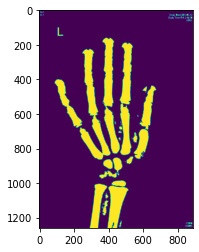

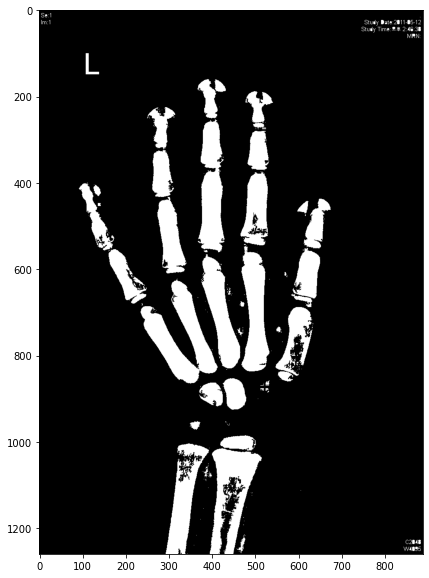

In [ ]:

# 이미지 전처리 함수 (img, 모폴로지값1, 2,3)
def merong(img,a,b,c):
  # 이미지 가져오기
  # img = cv2.imread('1_F_손목 - 복사본.jpg',cv2.IMREAD_COLOR)
  img_ = img.copy()

  # 이미지 Lab
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

  # 모폴리지
  k = cv2.getStructuringElement(cv2.MORPH_CROSS, (a, a))
  img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)

  # 필터
  img = cv2.bilateralFilter(img,-1, 10, 5)

  # Lab to gray for binary
  img = cv2.cvtColor(img, cv2.COLOR_Lab2BGR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # # 정규화
  # img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

  # # 평탄화 (Clahe)
  # # img = cv2.equalizeHist(img)
  # clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(3,3)) #CLAHE 생성
  # img= clahe.apply(img)           #CLAHE 적용


  # binary
  ret, mask = cv2.threshold(img, 
                          np.mean(img), # thresh= 이미지의 평균값을 임계치로
                          255,
                          cv2.THRESH_BINARY)
  
  # 같은 픽셀 강도를 갖는 애들 연결해줌 (오브젝트 검출)
  contours, hierarchy = cv2.findContours(mask, # 마스크에서
                                         cv2.RETR_EXTERNAL, # 바깥쪽 라인만
                                         cv2.CHAIN_APPROX_SIMPLE) # 컨투어 꼭짓점 좌표만 제공 
  # 그려주기
  cv2.drawContours(mask, contours,
                   -1, (255, 255, 255), -1) # -1: 모든 컨트어 표시 /color/ fill

  print('mask')
  plt.imshow(mask)
  plt.show()

  #### 강 조
  # 모폴로지
  k = cv2.getStructuringElement(cv2.MORPH_CROSS, (b, b))
  img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)

  # contrast
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
  # # 뼈강조하고 마스크랑 비트 연산
  # # 모폴로지
  # k2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (c, c))
  # img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k2)

  # contrast 함수 넣어주기 
  img= contrast(img,mask,c)



  # 컨투어
  contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(img, contours, -1, (255, 255, 255), -1)

  # 마스크랑 비트 연산 - 이미지랑 마스크 둘 다에서 흰색인 부분만 출력
  img = cv2.bitwise_and(img, mask) 

  # 크기 표준화
  # img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

  plt.figure(figsize=(12,10))
  plt.imshow(img,'gray')
  plt.show()

merong(img,55,30,50)


# merong2 함수 (좀 고침)

In [ ]:
# 이미지 1개 img 적용
img = cv2.imread('6_F.jpg',cv2.IMREAD_COLOR)

58.64716159611993


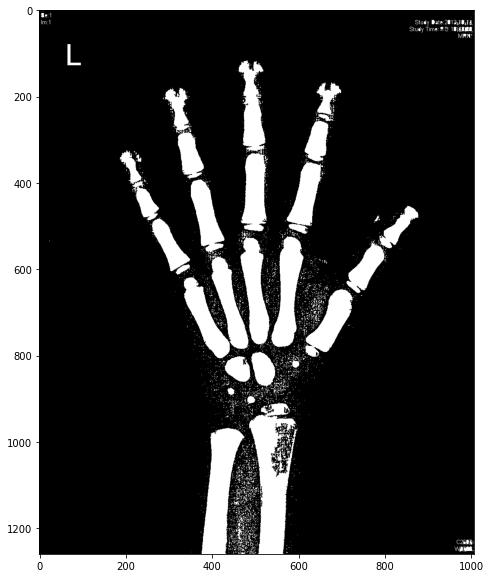

In [126]:
## 메롱두번쨰 
# 이미지 전처리 함수 (img, 모폴로지값1, 2,3)
def merong(img,a,b,d,e):
  # 이미지 가져오기
  # img = cv2.imread('1_F_손목 - 복사본.jpg',cv2.IMREAD_COLOR)
  img1 = img.copy()

  # dehazing (must be a color image)
  img1 = image_dehazer.remove_haze(img1)		# Remove Haze


  # # 이미지 Lab
  # img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
  # img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2Lab)

  # # 모폴리지
  # k = cv2.getStructuringElement(cv2.MORPH_CROSS, (a, a))
  # img1 = cv2.morphologyEx(img1, cv2.MORPH_TOPHAT, k) # 밝기 값이 크게 튀는 곳을 강조

  # # 필터
  # img1 = cv2.bilateralFilter(img1,-1, d, e)

  # # Lab to gray for binary
  # img1 = cv2.cvtColor(img1, cv2.COLOR_Lab2BGR)
  # img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

  # 정규화
  img1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX)

  # 평탄화 (Clahe)
  img1 = cv2.equalizeHist(img1)
  clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(3,3)) #CLAHE 생성
  img1= clahe.apply(img1)           #CLAHE 적용


  # binary
  ret, mask = cv2.threshold(img1,
                            np.mean(img1), # thresh= 이미지의 평균값을 임계치로
                            255,
                            cv2.THRESH_BINARY) # ret - 임계값, mask = img마스크
  
  # 같은 픽셀 강도를 갖는 애들 연결해줌 (오브젝트 검출)
  contours, hierarchy = cv2.findContours(mask, # 마스크에서
                                         cv2.RETR_EXTERNAL, # 바깥쪽 라인만
                                         cv2.CHAIN_APPROX_SIMPLE) # 컨투어 꼭짓점 좌표만 제공 

  cv2.drawContours(mask, contours, -1, (255,255,255), -1) # -1: 모든 컨트어 표시 /color/ fill


  # plt.imshow(mask)
  # plt.show()










  #### 강 조
  img2 = img.copy()
  print(img.mean())
  # 모폴로지
  k2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(b,b))
  img2 = cv2.morphologyEx(img2, cv2.MORPH_TOPHAT, k2)

  # contrast
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  # img2= contrast(img2,mask,c)
  if img2.mean() <= 15:
      low = img2.mean() * 2.3
      high = img2.mean() * 2.5
  elif img2.mean() <= 20:
      low = img2.mean() * 2.3
      high = img2.mean() * 2.8
  else:
      low = img2.mean() * 2.3
      high = img2.mean() * 3

  img2 = contrast_roi(img2, low, high)


    
  # # 뼈강조하고 마스크랑 비트 연산
  # # 모폴로지
  # k2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (c, c))
  # img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k2)


  # 컨투어
  contours, hierarchy = cv2.findContours(img2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(img2, contours, -1, (255, 255, 255), -1)

  # 마스크랑 비트 연산 - 이미지랑 마스크 둘 다에서 흰색인 부분만 출력
  img2 = cv2.bitwise_and(img2, mask) 
  # img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
  img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

  plt.figure(figsize=(12,10))
  plt.imshow(img2,'gray')
  plt.show()

merong(img,55,60,50,25)

# 함수 이미지path로 적용시켜보기 
- 이렇게까지 했는데도 살이 그대로 남아있는 이유는?

['8_F.jpg', '9_F.jpg', '6_F.jpg', '7_F.jpg', '5_F.jpg', '1_F.jpg', '4_F.jpg', '20_F.jpg', '16_F.jpg', '19_F.jpg', '17_F.jpg', '15_F.jpg', '12_F.jpg', '3_F.jpg', '13_F.jpg', '14_F.jpg', '11_F.jpg', '18_F.jpg', '2_F.jpg', '10_F.jpg', 'Bone age 3yr F.xlsx', 'BA_F_3yr.zip']
52.672944465692105


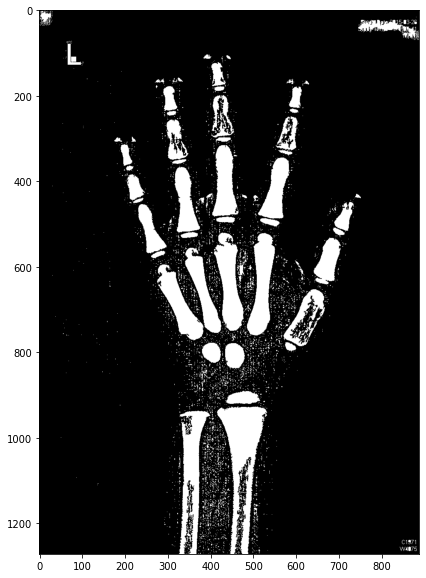

60.38881629531475


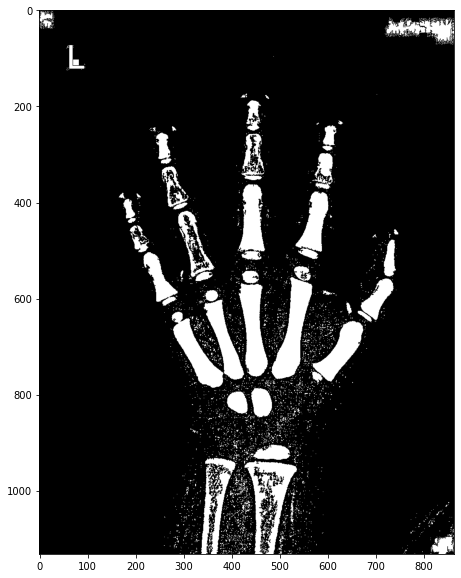

58.64716159611993


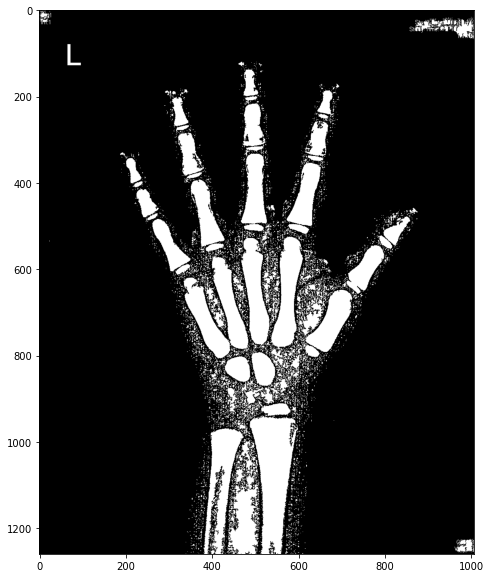

33.437614612957866


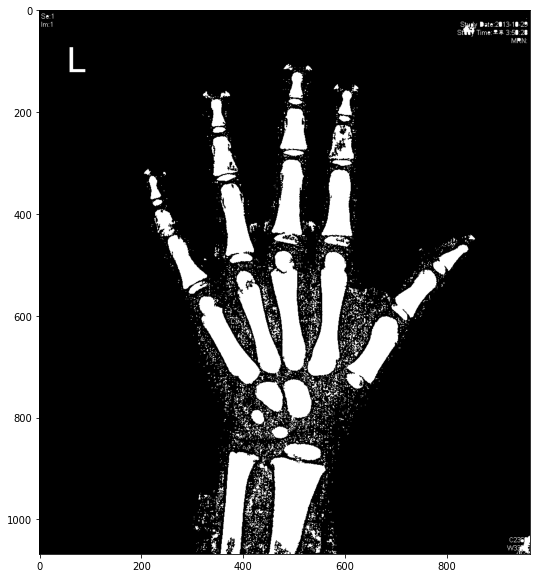

43.00521910687352


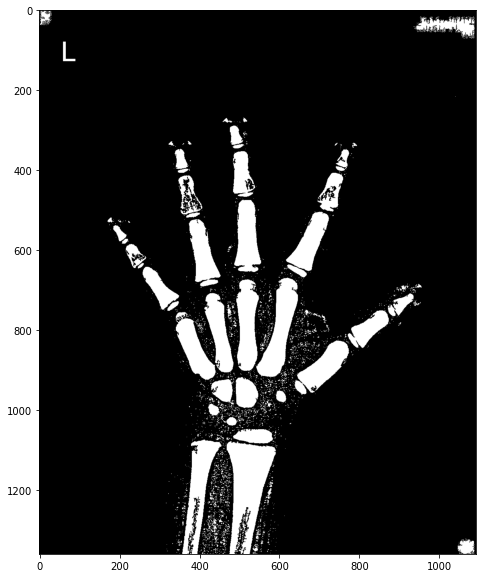

In [138]:
# 이미지 여러개에 함수 적용
import os
path = '/content/drive/MyDrive/cakd_colab/2차플젝/데이터 원본/데이터 원본/first'
dir_list = os.listdir(path)
print(dir_list)

for item in dir_list[:5] :
  img = cv2.imread(path+'/'+f'{item}',cv2.IMREAD_COLOR)
  merong(img,55,25,25,10) # 원래꺼 (스킨은 잘 안빠지고 지골이 잘 빠짐)
  # merong(img,55,60,50,25)  # 새로운거 (지골이 잘 안빠지고 스킨이 잘 빠짐)

['8_F.jpg', '9_F.jpg', '6_F.jpg', '7_F.jpg', '5_F.jpg', '1_F.jpg', '4_F.jpg', '20_F.jpg', '16_F.jpg', '19_F.jpg', '17_F.jpg', '15_F.jpg', '12_F.jpg', '3_F.jpg', '13_F.jpg', '14_F.jpg', '11_F.jpg', '18_F.jpg', '2_F.jpg', '10_F.jpg', 'Bone age 3yr F.xlsx', 'BA_F_3yr.zip']
52.672944465692105


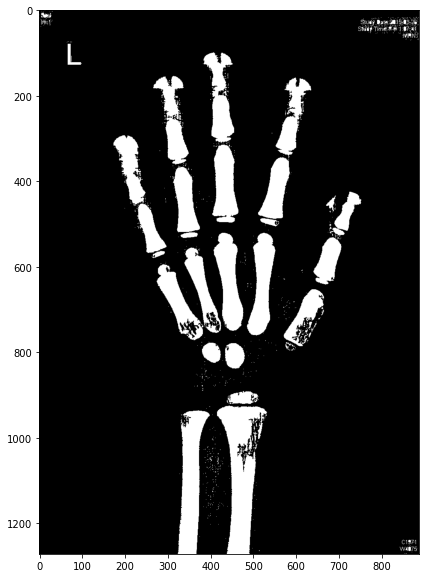

60.38881629531475


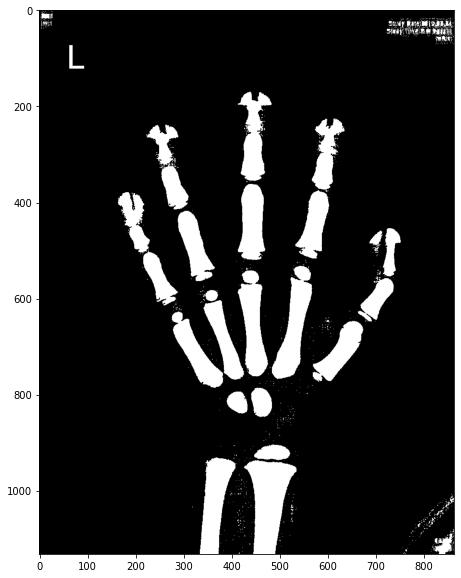

58.64716159611993


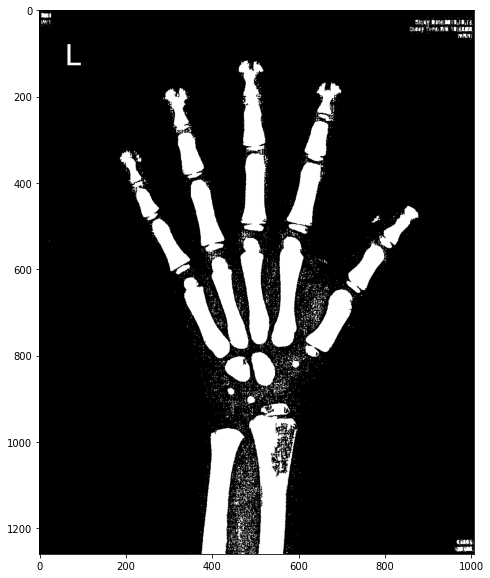

33.437614612957866


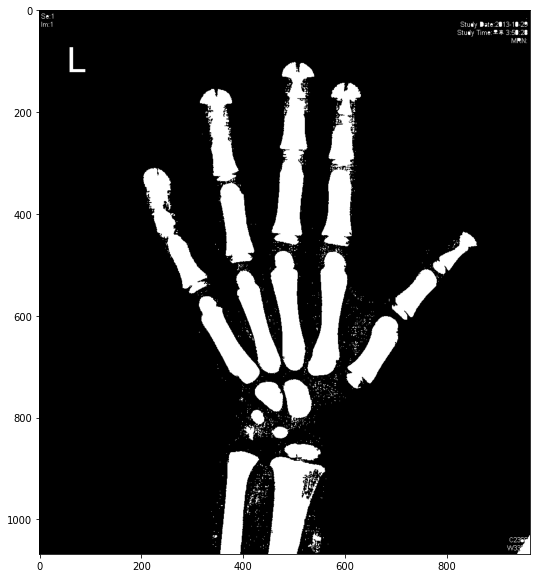

43.00521910687352


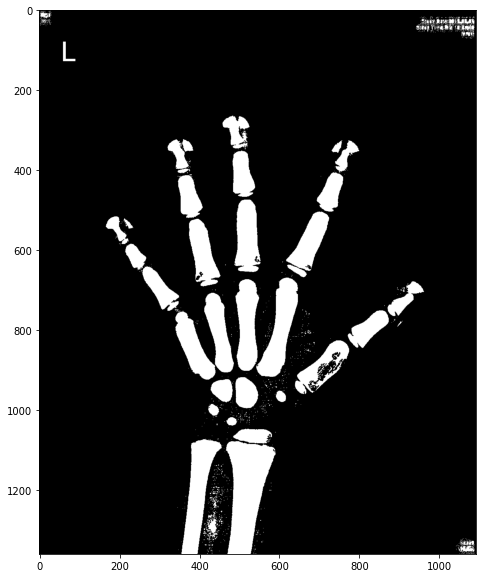

In [ ]:
# 이미지 여러개에 함수 적용
import os
path = '/content/drive/MyDrive/cakd_colab/2차플젝/데이터 원본/데이터 원본/first'
dir_list = os.listdir(path)
print(dir_list)

for item in dir_list[:5] :
  img = cv2.imread(path+'/'+f'{item}',cv2.IMREAD_COLOR)
  # merong(img,55,25,25,10) # 원래꺼 (스킨은 잘 안빠지고 지골이 잘 빠짐)
  merong(img,55,60,50,25)  # 새로운거 (지골이 잘 안빠지고 스킨이 잘 빠짐)

In [79]:
# 이미지 1개 가져오기
from google.colab import files
uploaded = files.upload()

Saving 6_F.jpg to 6_F (1).jpg


In [ ]:
# 이미지 1개 img 적용
img = cv2.imread('1_F.jpg',cv2.IMREAD_COLOR)


In [137]:
import sys
import numpy as np
import cv2
import math

def EditFcnProto(templateFile, height, width):
	with open(templateFile, 'r') as ft:
		template = ft.read()
		outFile = 'DehazeNetFcn.prototxt'
		with open(outFile, 'w') as fd:
			fd.write(template.format(height_15=height+15, width_15=width+15,
				height_11=height+11, width_11=width+11))

def TransmissionEstimate(im_path, height, width):
	caffe.set_mode_cpu()
	net = caffe.Net('DehazeNet.prototxt', 'DehazeNet.caffemodel', caffe.TEST)
	net_full_conv = caffe.Net('DehazeNetFcn.prototxt', 'DehazeNet.caffemodel', caffe.TEST)
	net_full_conv.params['ip1-conv'][0].data.flat = net.params['ip1'][0].data.flat
	net_full_conv.params['ip1-conv'][1].data[...] = net.params['ip1'][1].data
	im = caffe.io.load_image(im_path)
	npad = ((7,8), (7,8), (0,0))
	im = np.pad(im, npad, 'symmetric')
	transformers = caffe.io.Transformer({'data': net_full_conv.blobs['data'].data.shape})
	transformers.set_transpose('data', (2,0,1))
	transformers.set_channel_swap('data', (2,1,0))
	out = net_full_conv.forward_all(data=np.array([transformers.preprocess('data', im-0.2)]))
	transmission = np.reshape(out['ip1-conv'], (height,width))
	return transmission

def DarkChannel(im,sz):
	b,g,r = cv2.split(im)
	dc = cv2.min(cv2.min(r,g),b)
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(sz,sz))
	dark = cv2.erode(dc,kernel)
	return dark

def AtmLight(im,dark):
	[h,w] = im.shape[:2]
	imsz = h*w
	numpx = int(max(math.floor(imsz/1000),1))
	darkvec = dark.reshape(imsz,1)
	imvec = im.reshape(imsz,3)
	indices = darkvec.argsort()
	indices = indices[imsz-numpx::]
	atmsum = np.zeros([1,3])
	for ind in range(1,numpx):
		atmsum = atmsum + imvec[indices[ind]]
	A = atmsum / numpx
	return A

def Guidedfilter(im,p,r,eps):
	mean_I = cv2.boxFilter(im,cv2.CV_64F,(r,r))
	mean_p = cv2.boxFilter(p, cv2.CV_64F,(r,r))
	mean_Ip = cv2.boxFilter(im*p,cv2.CV_64F,(r,r))
	cov_Ip = mean_Ip - mean_I*mean_p
	mean_II = cv2.boxFilter(im*im,cv2.CV_64F,(r,r))
	var_I   = mean_II - mean_I*mean_I
	a = cov_Ip/(var_I + eps)
	b = mean_p - a*mean_I
	mean_a = cv2.boxFilter(a,cv2.CV_64F,(r,r))
	mean_b = cv2.boxFilter(b,cv2.CV_64F,(r,r))
	q = mean_a*im + mean_b
	return q

def TransmissionRefine(im,et):
	gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
	gray = np.float64(gray)/255
	r = 60
	eps = 0.0001
	t = Guidedfilter(gray,et,r,eps)
	return t

def Recover(im,t,A,tx = 0.1):
	res = np.empty(im.shape,im.dtype)
	t = cv2.max(t,tx)
	for ind in range(0,3):
		res[:,:,ind] = (im[:,:,ind]-A[0,ind])/t + A[0,ind]
	return res

if __name__ == '__main__':
	if not len(sys.argv) == 2:
		print 'Usage: python DeHazeNet.py haze_img_path'
		exit()
	else:
		im_path = sys.argv[1]
	src = cv2.imread('6_F.jpg')
	height = src.shape[0]
	width = src.shape[1]
	templateFile = 'DehazeFcnTemplate.prototxt'
	EditFcnProto(templateFile, height, width)
	I = src/255.0
	dark = DarkChannel(I,15)
	A = AtmLight(I,dark)
	te = TransmissionEstimate(im_path, height, width)
	t = TransmissionRefine(src,te)
	J = Recover(I,t,A,0.1)
	plt.imshow('TransmissionEstimate',te)
	plt.imshow('TransmissionRefine',t)
	plt.imshow('Origin',src)
	plt.imshow('Dehaze',J)
 
  plt.show()
 

SyntaxError: ignored

In [ ]:
# dehazing
# def DarkChannel(im,sz):
#     b,g,r = cv2.split(im)
#     dc = cv2.min(cv2.min(r,g),b);
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(sz,sz))
#     dark = cv2.erode(dc,kernel)
#     return dark

# def AtmLight(im,dark):
#     [h,w] = im.shape[:2]
#     imsz = h*w
#     numpx = int(max(math.floor(imsz/1000),1))
#     darkvec = dark.reshape(imsz);
#     imvec = im.reshape(imsz,3);

#     indices = darkvec.argsort();
#     indices = indices[imsz-numpx::]

#     atmsum = np.zeros([1,3])
#     for ind in range(1,numpx):
#        atmsum = atmsum + imvec[indices[ind]]

#     A = atmsum / numpx;
#     return A

# def TransmissionEstimate(im,A,sz):
#     omega = 0.95;
#     im3 = np.empty(im.shape,im.dtype);

#     for ind in range(0,3):
#         im3[:,:,ind] = im[:,:,ind]/A[0,ind]

#     transmission = 1 - omega*DarkChannel(im3,sz);
#     return transmission

# def Guidedfilter(im,p,r,eps):
#     mean_I = cv2.boxFilter(im,cv2.CV_64F,(r,r));
#     mean_p = cv2.boxFilter(p, cv2.CV_64F,(r,r));
#     mean_Ip = cv2.boxFilter(im*p,cv2.CV_64F,(r,r));
#     cov_Ip = mean_Ip - mean_I*mean_p;

#     mean_II = cv2.boxFilter(im*im,cv2.CV_64F,(r,r));
#     var_I   = mean_II - mean_I*mean_I;

#     a = cov_Ip/(var_I + eps);
#     b = mean_p - a*mean_I;

#     mean_a = cv2.boxFilter(a,cv2.CV_64F,(r,r));
#     mean_b = cv2.boxFilter(b,cv2.CV_64F,(r,r));

#     q = mean_a*im + mean_b;
#     return q;

# def TransmissionRefine(im,et):
#     gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY);
#     gray = np.float64(gray)/255;
#     r = 60;
#     eps = 0.0001;
#     t = Guidedfilter(gray,et,r,eps);

#     return t;

# def Recover(im,t,A,tx = 0.1):
#     res = np.empty(im.shape,im.dtype);
#     t = cv2.max(t,tx);

#     for ind in range(0,3):
#         res[:,:,ind] = (im[:,:,ind]-A[0,ind])/t + A[0,ind]

#     return res

# if __name__ == '__main__':
#     import sys
#     try:
#         fn = sys.argv[1]
#     except:
#         fn = '6_F.jpg'

#     def nothing(*argv):
#         pass

#     src = cv2.imread(fn)

#     I = src.astype('float64')/255;
 
#     dark = DarkChannel(I,15);
#     A = AtmLight(I,dark);
#     te = TransmissionEstimate(I,A,15);
#     t = TransmissionRefine(src,te);
#     J = Recover(I,t,A,0.1);

#     plt.imshow("dark",dark);
#     plt.imshow("t",t);
#     plt.imshow('I',src);
#     plt.imshow('J',J);

#     plt.show()